In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
aum = pd.read_csv('/content/aum.csv')
cust = pd.read_csv('/content/cust.csv')
prod = pd.read_csv('/content/prod_holding.csv')

In [ ]:
def DataOverview(df, text):
    print(f'{text}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nInfo:")
    print(df.info())
    print("\nSummarize:")
    print(df.describe())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [ ]:
aum.head(5)

,customer_id,amount
0,999992,6.197167e+08
1,999994,5.312117e+07
2,1000017,0.000000e+00
3,1000018,6.678269e+04
4,1000021,7.766416e+07


In [ ]:
DataOverview(aum, "AUM overview")

AUM overview:

Rows: 113066

Number of features: 2

Features:
['customer_id', 'amount']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  113066 non-null  int64  
 1   amount       113066 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB
None

Summarize:
        customer_id        amount
count  1.130660e+05  1.130660e+05
mean   1.875538e+06  6.548123e+07
std    1.144470e+06  1.022876e+09
min    1.293000e+03  0.000000e+00
25%    1.132518e+06  2.386672e+04
50%    1.395648e+06  6.794894e+04
75%    2.471803e+06  1.094568e+06
max    4.701974e+06  1.325000e+11

Missing values: 0

Unique values:
customer_id    113066
amount          77568
dtype: int64


In [ ]:
cust.head(5)

,customer_id,segment,province_city
0,1016846,Regular,HA NOI
1,1016868,Regular,HO CHI MINH
2,1016903,Regular,HO CHI MINH
3,1016936,Regular,HO CHI MINH
4,1016938,Regular,HA NOI


In [ ]:
DataOverview(cust, 'CUST overview')

CUST overview:

Rows: 113066

Number of features: 3

Features:
['customer_id', 'segment', 'province_city']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_id    113066 non-null  int64 
 1   segment        113066 non-null  object
 2   province_city  113066 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB
None

Summarize:
        customer_id
count  1.130660e+05
mean   1.875538e+06
std    1.144470e+06
min    1.293000e+03
25%    1.132518e+06
50%    1.395648e+06
75%    2.471803e+06
max    4.701974e+06

Missing values: 0

Unique values:
customer_id      113066
segment               3
province_city        42
dtype: int64


In [ ]:
prod.head(5)

,customer_id,prod_ca,prod_td,prod_credit_card
0,1016846,1,0,0.0
1,1016868,1,0,0.0
2,1016903,1,0,0.0
3,1016936,1,0,0.0
4,1016938,1,0,1.0


In [ ]:
DataOverview(prod,'PROD overview')

PROD overview:

Rows: 113066

Number of features: 4

Features:
['customer_id', 'prod_ca', 'prod_td', 'prod_credit_card']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_id       113066 non-null  int64  
 1   prod_ca           113066 non-null  int64  
 2   prod_td           113066 non-null  int64  
 3   prod_credit_card  112070 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 3.5 MB
None

Summarize:
        customer_id        prod_ca        prod_td  prod_credit_card
count  1.130660e+05  113066.000000  113066.000000     112070.000000
mean   1.875538e+06       0.897334       0.121584          0.210966
std    1.144470e+06       0.303523       0.326806          0.407996
min    1.293000e+03       0.000000       0.000000          0.000000
25%    1.132518e+06       1.000000       0.000000          0.000000

<Axes: >

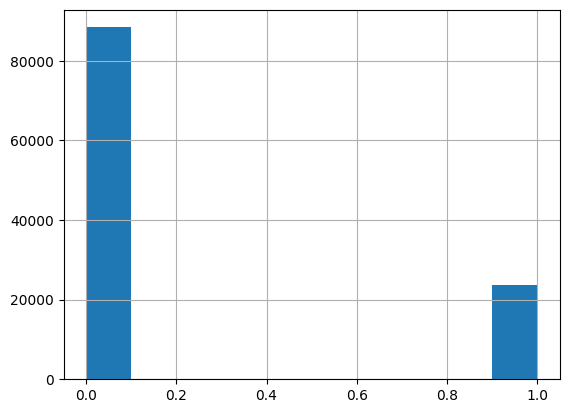

In [ ]:
prod['prod_credit_card'].hist()

Các giá trị null trong cột Prod_credit_card cần được thay thế bằng giá trị "0" và cột cần được chuyển đổi sang định dạng số nguyên (integer). (Chuyển các giá trị null về "0" để tránh ảnh hưởng tới phân phối giá trị của cột dựa vào biểu đồ trên)

In [ ]:
prod.loc[prod['prod_credit_card'].isnull(),'prod_credit_card'] = 0
prod['prod_credit_card'] = prod['prod_credit_card'].astype(int)

### 1. Rename the column "customer_id" to "cust_id" in all tables.

In [ ]:
aum.rename(columns={"customer_id": "cust_id"}, inplace=True)
cust.rename(columns={"customer_id": "cust_id"}, inplace=True)
prod.rename(columns={"customer_id": "cust_id"}, inplace=True)

### 2. The number and proportion of customers in each segment.

In [ ]:
segm = cust.groupby('segment', as_index=True).agg(number_of_customer = ('cust_id' , 'count'),percentage=('cust_id', lambda x: (x.count() / len(cust)) * 100))
segm

,number_of_customer,percentage
segment,,
Gold,3632,3.212283
Regular,91166,80.630782
Silver,18268,16.156935


Text(0.5, 1.0, 'Number of Customers for each segment')

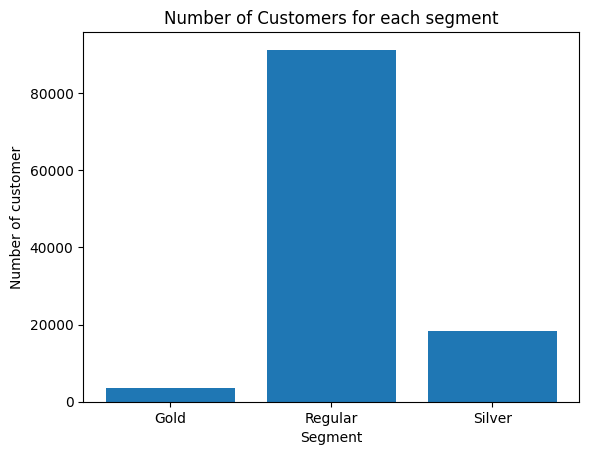

In [ ]:
plt.bar(segm.index, segm['number_of_customer'])
plt.xlabel('Segment')
plt.ylabel('Number of customer')
plt.title('Number of Customers for each segment')

### 3. The number of customers in each segment across provinces and cities, sorted in descending order of segments: Regular, Silver, and Gold .
List of column:
  + province/city
  + Regular
  + Silver
  + Gold

In [ ]:
province_segm = cust.pivot_table(index = 'province_city', columns = 'segment', values = 'cust_id', aggfunc = 'count')
province_segm.reset_index(inplace=True)
province_segm.head()

segment,province_city,Gold,Regular,Silver
0,AN GIANG,4.0,863.0,73.0
1,BAC GIANG,48.0,1066.0,272.0
2,BAC NINH,18.0,341.0,81.0
3,BINH DINH,9.0,388.0,70.0
4,BINH DUONG,5.0,984.0,101.0


In [ ]:
province_segm = province_segm.reindex(columns=['province_city', 'Regular', 'Silver', 'Gold'])
province_segm.head()

segment,province_city,Regular,Silver,Gold
0,AN GIANG,863.0,73.0,4.0
1,BAC GIANG,1066.0,272.0,48.0
2,BAC NINH,341.0,81.0,18.0
3,BINH DINH,388.0,70.0,9.0
4,BINH DUONG,984.0,101.0,5.0


###4. The aspects of customer's Asset Under Management (AUM) values across segments.
Value include:
- Minimum
- Q1 (25th percentile)
- Q2/Median (50th percentile)
- Q3 (75th percentile)
- Q9 (90th percentile)
- Maximum
- Mean

In [ ]:
aum_data = pd.merge(aum, cust, on = 'cust_id', how = 'inner')
aum_data.head()

,cust_id,amount,segment,province_city
0,999992,6.197167e+08,Regular,HAI DUONG
1,999994,5.312117e+07,Regular,HA NOI
2,1000017,0.000000e+00,Regular,HA NOI
3,1000018,6.678269e+04,Regular,HA NOI
4,1000021,7.766416e+07,Silver,HO CHI MINH


In [ ]:
aum_des = aum_data.groupby('segment', as_index= True)['amount'].describe()
aum_des

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
Gold,3632.0,1.589435e+09,5.480749e+09,0.0,8.411002e+07,5.587676e+08,1.335649e+09,1.325000e+11
Regular,91166.0,9.411988e+06,6.192274e+07,0.0,2.383338e+04,5.875266e+04,2.582428e+05,6.183456e+09
Silver,18268.0,4.230462e+07,8.936781e+07,0.0,8.664998e+04,1.894635e+06,2.640585e+07,1.250000e+09


In [ ]:
aum_des['90%'] = aum_data.groupby('segment', as_index=True)['amount'].quantile(0.9)
aum_des.reset_index(inplace=True)
aum_des

,segment,count,mean,std,min,25%,50%,75%,max,90%
0,Gold,3632.0,1.589435e+09,5.480749e+09,0.0,8.411002e+07,5.587676e+08,1.335649e+09,1.325000e+11,2.981253e+09
1,Regular,91166.0,9.411988e+06,6.192274e+07,0.0,2.383338e+04,5.875266e+04,2.582428e+05,6.183456e+09,4.537595e+06
2,Silver,18268.0,4.230462e+07,8.936781e+07,0.0,8.664998e+04,1.894635e+06,2.640585e+07,1.250000e+09,1.684323e+08


<Axes: xlabel='segment', ylabel='amount'>

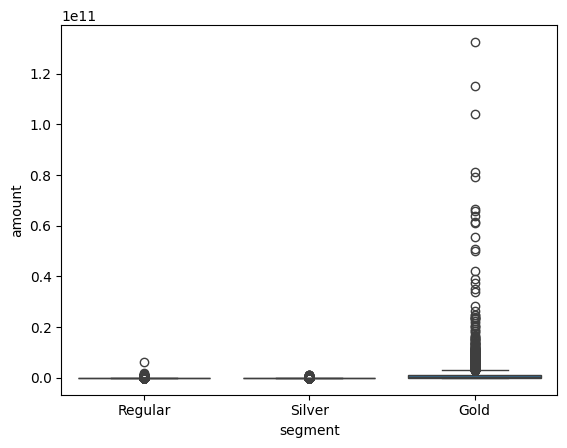

In [ ]:
import seaborn as sns
sns.boxplot(x='segment', y='amount', data=aum_data)

###5. The ownership percentages of Credit Card, Current Account, and Term Deposit products within the Regular customer segment.
Data label:
- Current Account: prod_ca
- Term Deposit:	prod_td
- Credit Card: prod_credit_card



In [ ]:
prod_data = pd.merge(cust.loc[cust['segment'] == 'Regular','cust_id'], prod, on = 'cust_id', how = 'inner')
prod_data.head()

,cust_id,prod_ca,prod_td,prod_credit_card
0,1016846,1,0,0
1,1016868,1,0,0
2,1016903,1,0,0
3,1016936,1,0,0
4,1016938,1,0,1


In [ ]:
prod_data = prod_data.melt(id_vars= 'cust_id', value_vars = ['prod_ca',	'prod_td',	'prod_credit_card']).rename(columns= {'variable':'Product'})
prod_data.head()

,cust_id,Product,value
0,1016846,prod_ca,1
1,1016868,prod_ca,1
2,1016903,prod_ca,1
3,1016936,prod_ca,1
4,1016938,prod_ca,1


In [ ]:
prod_data = prod_data.groupby('Product', as_index = False).agg(
                      Number_of_user_own_product = ('value','sum'),
                      Number_of_user_not_using_product = ('value', lambda x: prod_data['cust_id'].nunique() - x.sum()),
                      percent_over_all = ('value', lambda x: np.round((x.sum() / prod_data['cust_id'].nunique()) * 100, 2))
                      )
prod_data

,Product,Number_of_user_own_product,Number_of_user_not_using_product,percent_over_all
0,prod_ca,82658,8508,90.67
1,prod_credit_card,12255,78911,13.44
2,prod_td,7523,83643,8.25
